## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  67.324011   869.385721  0.697751   4.622899  610.324350
1  76.150348   674.537279  0.944394   1.319304  641.634945
2  33.667653  1026.441036  0.840046  10.959543  862.869226
3   6.763314   321.984624  0.856560   3.199831  275.901492
4  84.943363   179.352715  0.993185   8.790337  197.378037


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9867831	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9783543	total: 58.2ms	remaining: 29s
2:	learn: 0.9693769	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9597608	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9475211	total: 60.1ms	remaining: 12s
5:	learn: 0.9364388	total: 60.6ms	remaining: 10s
6:	learn: 0.9238463	total: 61.3ms	remaining: 8.69s
7:	learn: 0.9130203	total: 61.7ms	remaining: 7.65s
8:	learn: 0.9022299	total: 62.1ms	remaining: 6.84s
9:	learn: 0.8912990	total: 62.7ms	remaining: 6.21s
10:	learn: 0.8786499	total: 63.2ms	remaining: 5.68s
11:	learn: 0.8652549	total: 63.8ms	remaining: 5.25s
12:	learn: 0.8542934	total: 64.2ms	remaining: 4.88s
13:	learn: 0.8420428	total: 64.6ms	remaining: 4.55s
14:	learn: 0.8320944	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8231345	total: 65.3ms	remaining: 4.02s
16:	learn: 0.8129889	total: 65.8ms	remaining: 3.8s
17:	learn: 0.8035325	total: 66.1ms	remaining: 3.61s
18:	learn: 0.7957812	total: 66.5ms	remaining: 3.43s

102:	learn: 0.3120182	total: 103ms	remaining: 898ms
103:	learn: 0.3091778	total: 104ms	remaining: 895ms
104:	learn: 0.3054560	total: 104ms	remaining: 889ms
105:	learn: 0.3027830	total: 105ms	remaining: 883ms
106:	learn: 0.2993662	total: 105ms	remaining: 878ms
107:	learn: 0.2957546	total: 106ms	remaining: 872ms
108:	learn: 0.2930359	total: 106ms	remaining: 867ms
109:	learn: 0.2898491	total: 106ms	remaining: 861ms
110:	learn: 0.2870727	total: 107ms	remaining: 857ms
111:	learn: 0.2842603	total: 107ms	remaining: 851ms
112:	learn: 0.2809556	total: 108ms	remaining: 847ms
113:	learn: 0.2778726	total: 108ms	remaining: 841ms
114:	learn: 0.2750804	total: 109ms	remaining: 835ms
115:	learn: 0.2718426	total: 109ms	remaining: 831ms
116:	learn: 0.2683852	total: 109ms	remaining: 825ms
117:	learn: 0.2662417	total: 110ms	remaining: 820ms
118:	learn: 0.2638463	total: 110ms	remaining: 815ms
119:	learn: 0.2605454	total: 110ms	remaining: 810ms
120:	learn: 0.2572256	total: 111ms	remaining: 805ms
121:	learn: 

280:	learn: 0.0661693	total: 184ms	remaining: 472ms
281:	learn: 0.0656698	total: 185ms	remaining: 471ms
282:	learn: 0.0652324	total: 185ms	remaining: 470ms
283:	learn: 0.0647787	total: 186ms	remaining: 468ms
284:	learn: 0.0642206	total: 186ms	remaining: 467ms
285:	learn: 0.0637808	total: 187ms	remaining: 466ms
286:	learn: 0.0633555	total: 187ms	remaining: 464ms
287:	learn: 0.0629701	total: 187ms	remaining: 463ms
288:	learn: 0.0625887	total: 188ms	remaining: 462ms
289:	learn: 0.0620441	total: 188ms	remaining: 461ms
290:	learn: 0.0616992	total: 188ms	remaining: 459ms
291:	learn: 0.0612769	total: 189ms	remaining: 458ms
292:	learn: 0.0608933	total: 189ms	remaining: 457ms
293:	learn: 0.0605382	total: 190ms	remaining: 455ms
294:	learn: 0.0601628	total: 190ms	remaining: 454ms
295:	learn: 0.0597663	total: 190ms	remaining: 453ms
296:	learn: 0.0594177	total: 191ms	remaining: 452ms
297:	learn: 0.0590408	total: 191ms	remaining: 451ms
298:	learn: 0.0585986	total: 192ms	remaining: 449ms
299:	learn: 

509:	learn: 0.0197881	total: 284ms	remaining: 273ms
510:	learn: 0.0196823	total: 284ms	remaining: 272ms
511:	learn: 0.0196354	total: 285ms	remaining: 272ms
512:	learn: 0.0195339	total: 285ms	remaining: 271ms
513:	learn: 0.0194908	total: 286ms	remaining: 270ms
514:	learn: 0.0193886	total: 286ms	remaining: 270ms
515:	learn: 0.0192874	total: 287ms	remaining: 269ms
516:	learn: 0.0192453	total: 287ms	remaining: 268ms
517:	learn: 0.0191459	total: 288ms	remaining: 268ms
518:	learn: 0.0190762	total: 288ms	remaining: 267ms
519:	learn: 0.0189893	total: 289ms	remaining: 267ms
520:	learn: 0.0189113	total: 289ms	remaining: 266ms
521:	learn: 0.0187713	total: 290ms	remaining: 265ms
522:	learn: 0.0187035	total: 290ms	remaining: 265ms
523:	learn: 0.0185674	total: 291ms	remaining: 264ms
524:	learn: 0.0184345	total: 291ms	remaining: 263ms
525:	learn: 0.0183137	total: 291ms	remaining: 263ms
526:	learn: 0.0181862	total: 292ms	remaining: 262ms
527:	learn: 0.0181245	total: 292ms	remaining: 261ms
528:	learn: 

685:	learn: 0.0101485	total: 365ms	remaining: 167ms
686:	learn: 0.0101239	total: 366ms	remaining: 167ms
687:	learn: 0.0100689	total: 366ms	remaining: 166ms
688:	learn: 0.0100081	total: 367ms	remaining: 165ms
689:	learn: 0.0099486	total: 367ms	remaining: 165ms
690:	learn: 0.0098981	total: 367ms	remaining: 164ms
691:	learn: 0.0098682	total: 368ms	remaining: 164ms
692:	learn: 0.0098191	total: 368ms	remaining: 163ms
693:	learn: 0.0097952	total: 369ms	remaining: 163ms
694:	learn: 0.0097381	total: 369ms	remaining: 162ms
695:	learn: 0.0096895	total: 369ms	remaining: 161ms
696:	learn: 0.0096408	total: 370ms	remaining: 161ms
697:	learn: 0.0096118	total: 370ms	remaining: 160ms
698:	learn: 0.0095639	total: 371ms	remaining: 160ms
699:	learn: 0.0095147	total: 371ms	remaining: 159ms
700:	learn: 0.0094778	total: 372ms	remaining: 159ms
701:	learn: 0.0094549	total: 372ms	remaining: 158ms
702:	learn: 0.0094010	total: 373ms	remaining: 157ms
703:	learn: 0.0093553	total: 373ms	remaining: 157ms
704:	learn: 

910:	learn: 0.0048367	total: 464ms	remaining: 45.4ms
911:	learn: 0.0048316	total: 465ms	remaining: 44.8ms
912:	learn: 0.0048182	total: 465ms	remaining: 44.3ms
913:	learn: 0.0048006	total: 466ms	remaining: 43.8ms
914:	learn: 0.0047969	total: 466ms	remaining: 43.3ms
915:	learn: 0.0047839	total: 466ms	remaining: 42.8ms
916:	learn: 0.0047772	total: 467ms	remaining: 42.2ms
917:	learn: 0.0047717	total: 467ms	remaining: 41.7ms
918:	learn: 0.0047563	total: 468ms	remaining: 41.2ms
919:	learn: 0.0047509	total: 468ms	remaining: 40.7ms
920:	learn: 0.0047359	total: 468ms	remaining: 40.2ms
921:	learn: 0.0047206	total: 469ms	remaining: 39.7ms
922:	learn: 0.0047059	total: 469ms	remaining: 39.1ms
923:	learn: 0.0046902	total: 470ms	remaining: 38.6ms
924:	learn: 0.0046759	total: 470ms	remaining: 38.1ms
925:	learn: 0.0046630	total: 470ms	remaining: 37.6ms
926:	learn: 0.0046494	total: 471ms	remaining: 37.1ms
927:	learn: 0.0046353	total: 471ms	remaining: 36.5ms
928:	learn: 0.0046302	total: 471ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

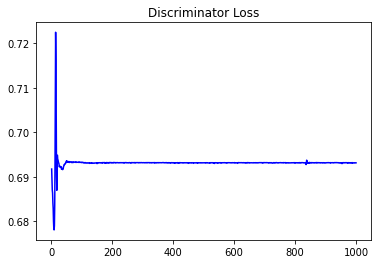

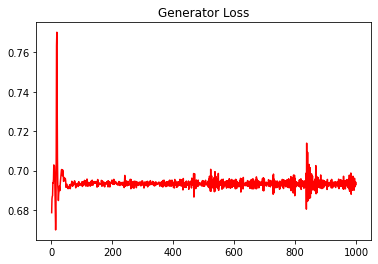

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.006435963584377271


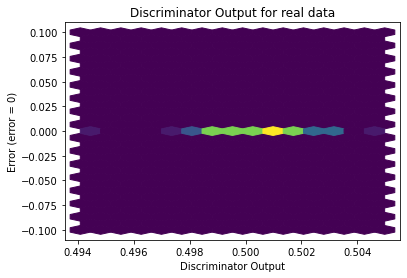

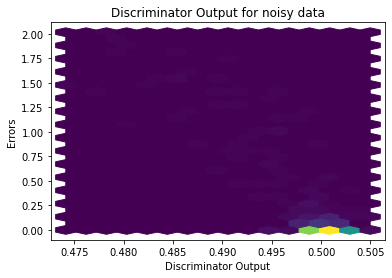

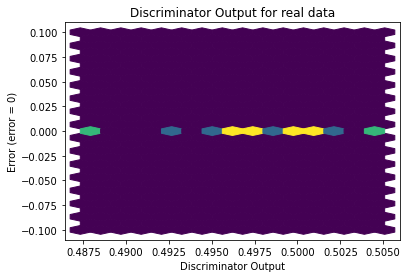

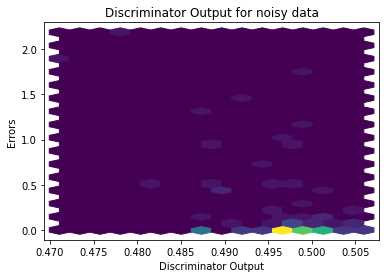

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


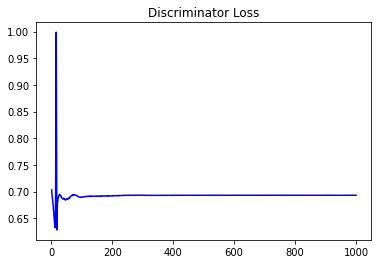

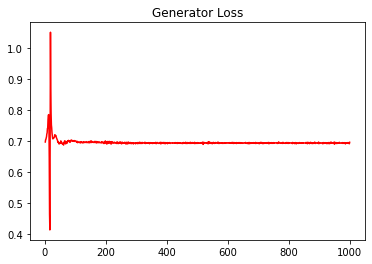

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.031819857169139494


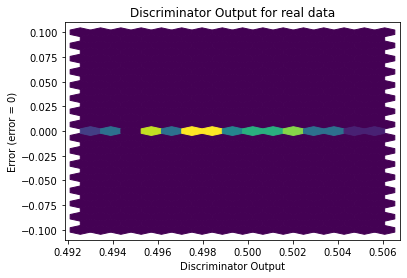

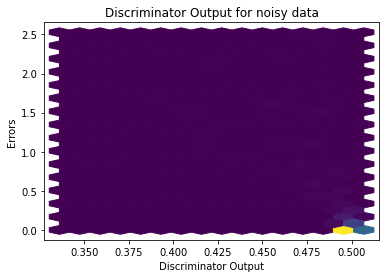

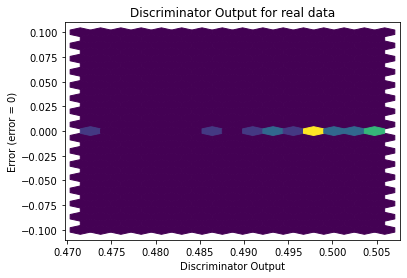

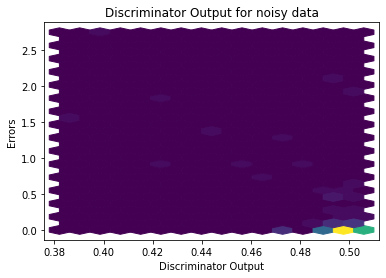

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0766]], requires_grad=True)
